# Machine Learning Engineer Nanodegree
## Capstone Project
Haleh Dolati
Feb, 2018

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
% pylab inline
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.tree import export_graphviz

Populating the interactive namespace from numpy and matplotlib


/Users/Haleh/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy

/Users/Haleh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# import data and merge 

In [2]:
# Load the properties and transactions datasets
homes = pd.read_csv("./Data/properties_2016.csv")
transactions = pd.read_csv("./Data/transactions_2016.csv", parse_dates = ['transactiondate'])

In [3]:
print "homes dataframe size:" , homes.shape
print "there are" ,  homes['parcelid'].nunique(), "unique parcelid in homes"
print "transactions dataframe size:" , transactions.shape
print "there are" , transactions['parcelid'].nunique(), "unique parcelid in transactions "

homes dataframe size: (2985217, 58)
there are 2985217 unique parcelid in homes
transactions dataframe size: (90275, 3)
there are 90150 unique parcelid in transactions 


In [4]:
test=transactions[transactions['parcelid'].duplicated(keep=False)]

In [5]:
len(test['parcelid'].unique())

124

In [6]:
display(homes.head())

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [7]:
display(transactions.head())

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [8]:
# merge properties and transactions and save it as a new file
properties_data = pd.merge(transactions, homes, on='parcelid', how='left')
properties_data.to_csv('data/properties_data.csv', index=False)


In [9]:
# new complete df
properties_data.shape
print "properties_data dataframe size after merge:" , properties_data.shape
print "there are" ,  properties_data['parcelid'].nunique(), "unique parcelid in properties_data"


properties_data dataframe size after merge: (90275, 60)
there are 90150 unique parcelid in properties_data


In [10]:
display (properties_data.head(5).transpose())

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
airconditioningtypeid,1,NaN,1,1,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4,4,NaN


In [11]:
properties_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

# EDA: 
## Look at LOGERROR

In [12]:
# Minimum logerror
minimum_logerror = np.min(properties_data['logerror'])

# Maximum logerror
maximum_logerror = np.max(properties_data['logerror'])

# Mean logerror
mean_logerror = np.mean(properties_data['logerror'])

# Median logerror
median_logerror = np.median(properties_data['logerror'])

# Standard deviation of logerror
std_logerror = np.std(properties_data['logerror'])

# Show the calculated statistics
print "Minimum logerror: {:,.2f}".format(minimum_logerror)
print "Maximum logerror: {:,.2f}".format(maximum_logerror)
print "Mean logerror: {:,.2f}".format(mean_logerror)
print "Median logerror: {:,.2f}".format(median_logerror)
print "Standard deviation of logerror: {:,.2f}".format(std_logerror)


Minimum logerror: -4.61
Maximum logerror: 4.74
Mean logerror: 0.01
Median logerror: 0.01
Standard deviation of logerror: 0.16


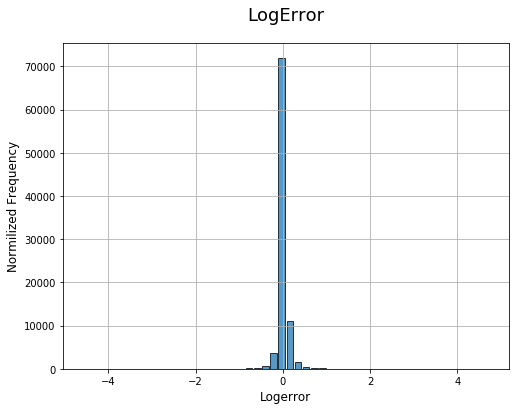

In [13]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(properties_data.logerror, 50, edgecolor='black',  alpha=0.75, rwidth=0.8)
plt.xlabel('Logerror', fontsize=12)
plt.ylabel('Normilized Frequency', fontsize=12)
plt.title('LogError', fontsize=18, y= 1.05)
plt.grid(True)
plt.show()

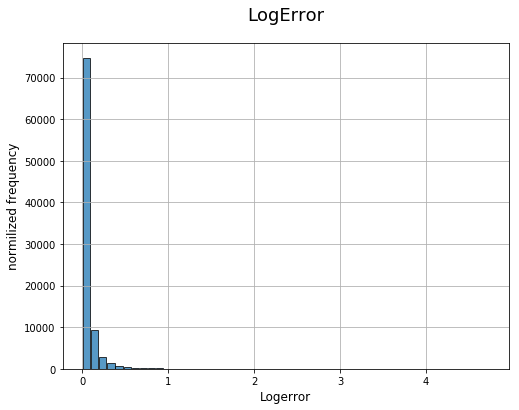

In [14]:
# plt.hist(properties_data.logerror)
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(abs(properties_data.logerror), 50, edgecolor='black',  alpha=0.75, rwidth=0.9)
plt.title('LogError', fontsize=18, y= 1.05)
plt.xlabel('Logerror', fontsize=12)
plt.ylabel('normilized frequency', fontsize=12)
plt.grid(True)
plt.show()

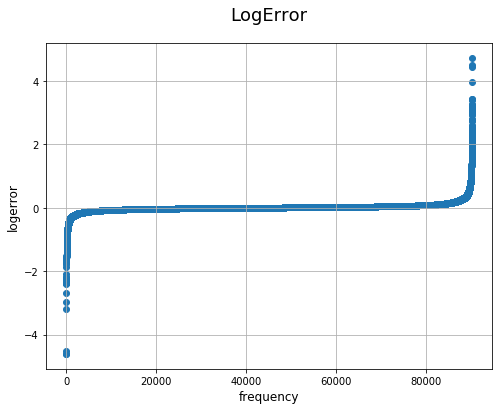

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(range(properties_data.shape[0]), np.sort(properties_data.logerror.values))
plt.title('LogError', fontsize=18, y= 1.05)
plt.xlabel('frequency', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.grid(True)
plt.show()

# feature cleaning: transaction Month and Day

In [16]:
# train_merge['month'] = train_merge['transactiondate'].apply(lambda x: int(x.split('-')[1]))
# train_merge['day'] = train_merge['transactiondate'].apply(lambda x: int(x.split('-')[2]))
properties_data['transaction_month'] = properties_data['transactiondate'].dt.month
properties_data['transaction_day'] = properties_data['transactiondate'].dt.day


# EDA: 
## year built

In [17]:
# plt.figure(figsize=(8,6))
# cnt_month = properties_data.yearbuilt.value_counts()
# g= sns.barplot(cnt_month.index, cnt_month.values, color='steelblue')
# plt.setp(g,xticks=[0,50,100])
# # g.set_xticklabels(rotation=90)
# # g.set(xticklabels=(0,2000,10))
# plt.title('Transaction Year Built', fontsize=16, y= 1.05)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.show()

# EDA: 
## Look at  Month and Day

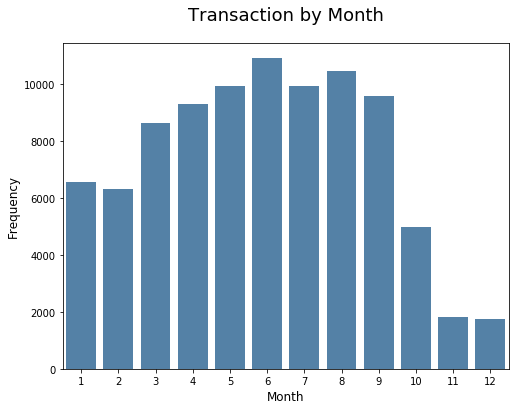

In [18]:
plt.figure(figsize=(8,6))
cnt_month = properties_data.transaction_month.value_counts()
sns.barplot(cnt_month.index, cnt_month.values, color='steelblue')
plt.title('Transaction by Month', fontsize=18, y= 1.05)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


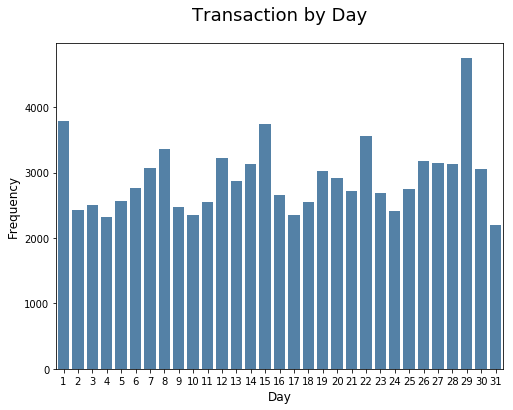

In [19]:
plt.figure(figsize=(8,6))
cnt_day = properties_data.transaction_day.value_counts()
sns.barplot(cnt_day.index, cnt_day.values, color='steelblue')
plt.title('Transaction by Day', fontsize=18, y= 1.05)

plt.xlabel('Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# EDA: 
## Look at  Location

Text(0.5,68,u'Latitude')

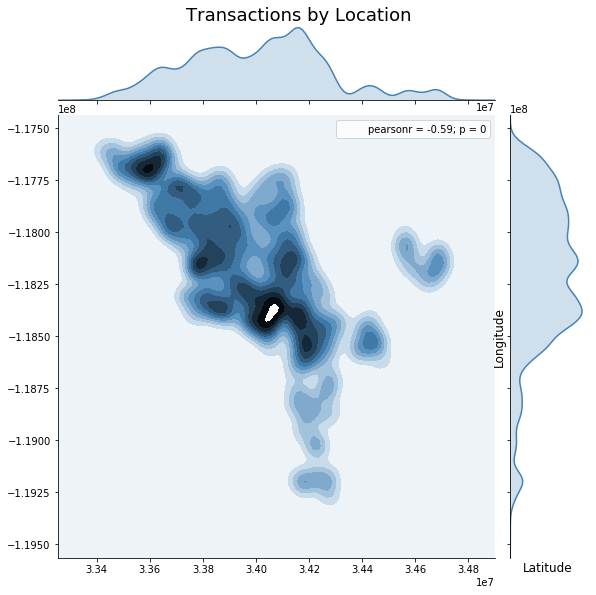

In [20]:
# plt.figure(figsize=(8,6))
sns.jointplot(x=properties_data.latitude.values, y=properties_data.longitude.values, 
              kind="kde",  color='steelblue', size=8)
plt.title('Transactions by Location', fontsize=18, y= 1.2, x=-2.8)

plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

Text(0.5,68,u'Latitude')

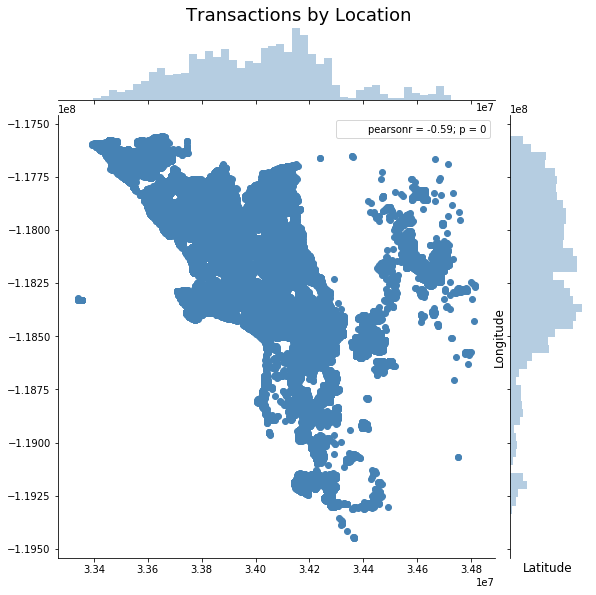

In [21]:
plt.figure(figsize=(8,8))
sns.jointplot(x=properties_data.latitude.values, y=properties_data.longitude.values, size=8, color='steelblue')
plt.title('Transactions by Location', fontsize=18, y= 1.2, x=-2.8)

plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# plt.show()

# EDA: 
## Look at Number of bathrooms 

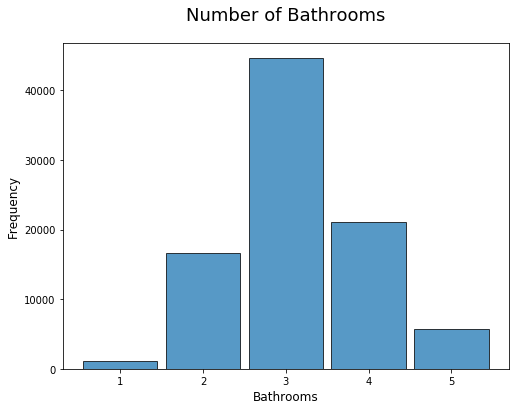

In [22]:
plt.figure(figsize=(8,6))
plt.hist(properties_data.bathroomcnt, bins=np.arange(0,6,1), align='right', edgecolor='black', alpha=0.75,rwidth=0.9)
plt.title('Number of Bathrooms', fontsize=18, y= 1.05)

plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# EDA: 
## Look at number of bedrooms

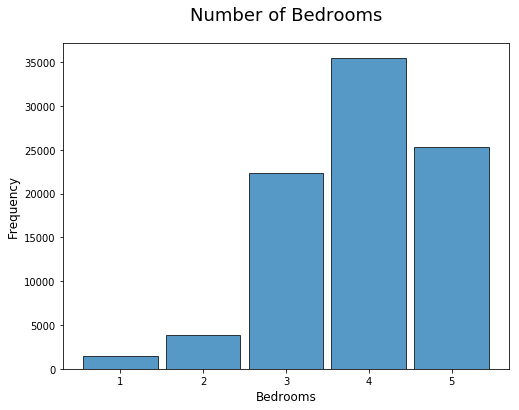

In [23]:
plt.figure(figsize=(8,6))
plt.hist(properties_data.bedroomcnt, bins=np.arange(0,6,1), align='right', edgecolor='black',  alpha=0.75, rwidth=0.9)
plt.title('Number of Bedrooms', fontsize=18, y= 1.05)

plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Bivariate Analysis

# EDA: 
## Look at log error and location

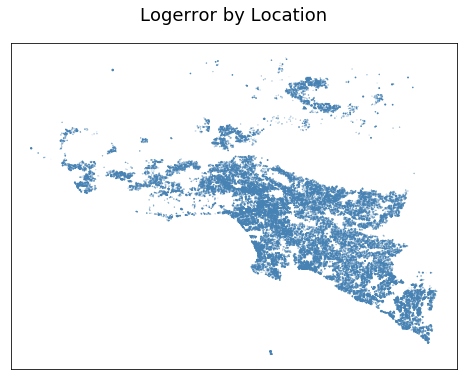

In [24]:
plt.figure(figsize=(8,6))

properties_data.plot(kind='scatter', x='longitude', y='latitude', color='steelblue',  
          s=properties_data['logerror'], label='logerror',figsize=(8,6))
plt.title('Logerror by Location', fontsize=18, y= 1.05)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks([], [])
plt.legend().set_visible(False)

In [25]:
properties_data['abslogerror']= abs(properties_data.logerror)

# EDA: 
## Look at  abs logerror by year built

Text(0,0.5,u'Logerror')

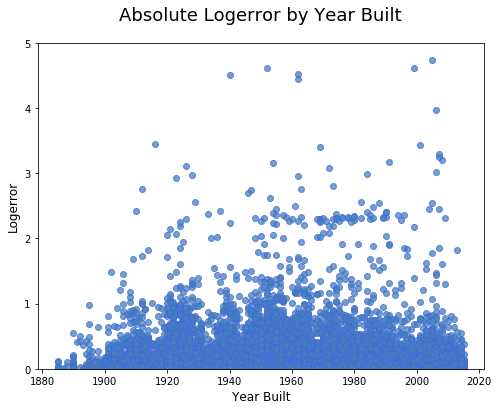

In [26]:
plt.figure(figsize=(8,6))
y= properties_data.abslogerror
x=properties_data.yearbuilt
plt.ylim(0, 5)
plt.plot(x,y, 'ro', alpha=0.75, color ='steelblue', markeredgecolor='royalblue')
plt.title('Absolute Logerror by Year Built', fontsize=18, y= 1.05)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Logerror', fontsize=12)


# EDA: 
## Look at  mean log error by MONTH


Text(0.5,1.05,u'Number Of Occurunces in 2016 per Month')

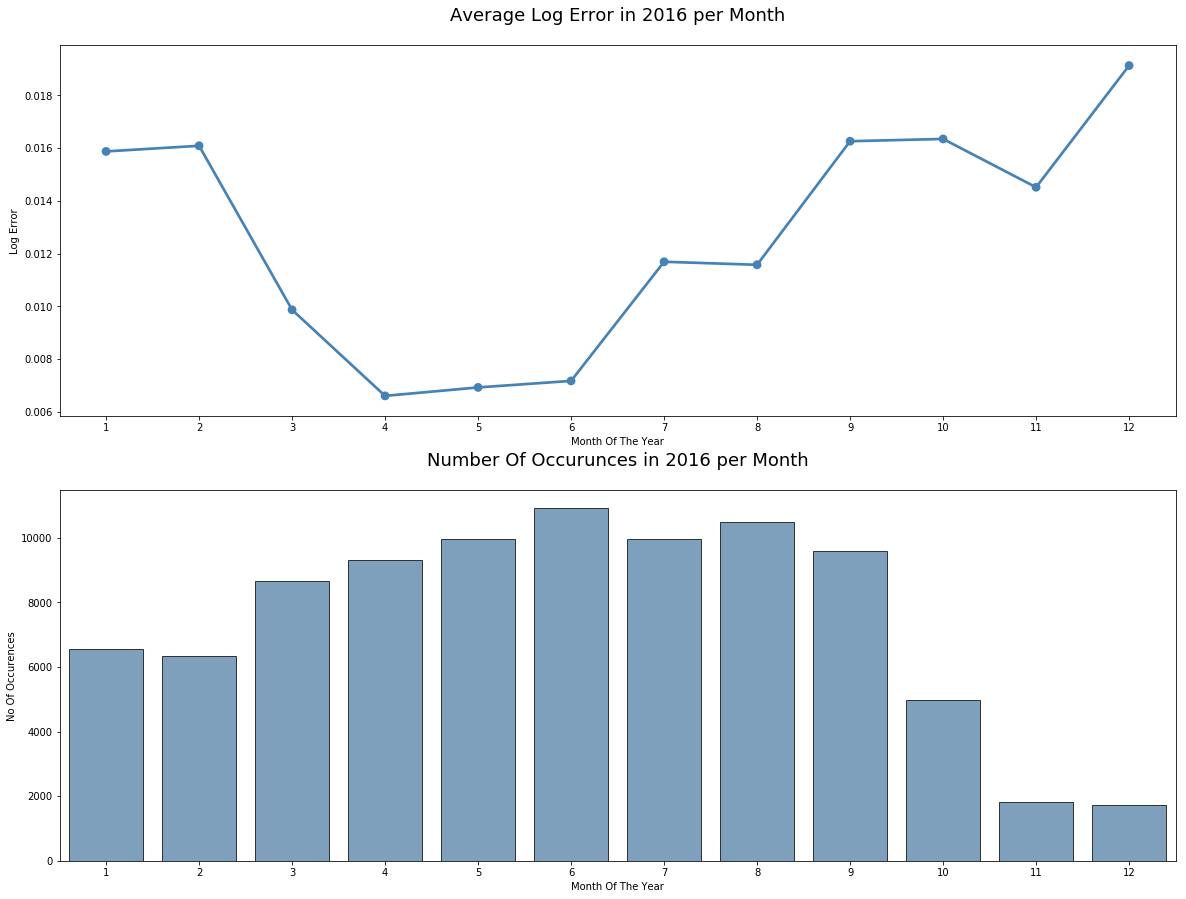

In [27]:
properties_data_groupedMonth = properties_data.groupby(["transaction_month"])["logerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)
sns.pointplot(x=properties_data_groupedMonth["transaction_month"], y=properties_data_groupedMonth["logerror"],
              join=True, ax=ax1, color = 'steelblue')
ax1.set(xlabel='Month Of The Year', ylabel='Log Error',label='big')
ax1.axes.set_title("Average Log Error in 2016 per Month",fontsize=18, y= 1.05)

sns.countplot(x=properties_data['transaction_month'], data=properties_data,ax=ax2, 
              edgecolor='black',  color = 'steelblue', alpha=0.75)
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',label='big')
ax2.axes.set_title("Number Of Occurunces in 2016 per Month",fontsize=18, y= 1.05)


# EDA: 
## Look at  mean abs log error by MONTH


Text(0.5,1.05,u'Number Of Occurunces in 2016 per Month')

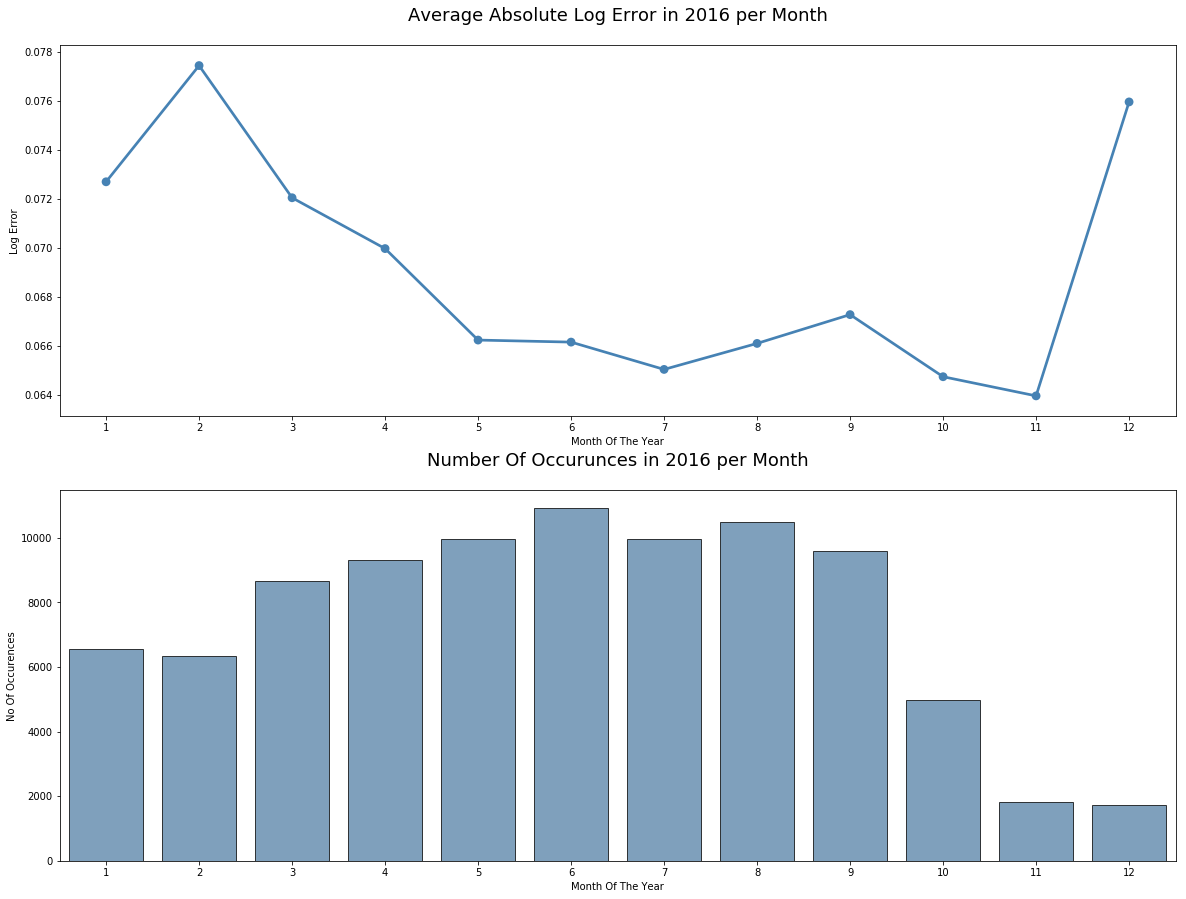

In [28]:
properties_data_groupedMonth = properties_data.groupby(["transaction_month"])["abslogerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)
sns.pointplot(x=properties_data_groupedMonth["transaction_month"], y=properties_data_groupedMonth["abslogerror"], 
             data=properties_data_groupedMonth, join=True,ax=ax1, color = 'steelblue')

ax1.set(xlabel='Month Of The Year', ylabel='Log Error',label='big')
ax1.axes.set_title("Average Absolute Log Error in 2016 per Month",fontsize=18, y= 1.05)

sns.countplot(x=properties_data['transaction_month'], data=properties_data,ax=ax2, edgecolor='black',  
              color = 'steelblue', alpha=0.75)

ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences', label='big')
ax2.axes.set_title("Number Of Occurunces in 2016 per Month",fontsize=18, y= 1.05)


#### log error by Day
%matplotlib inline
properties_data_groupedDay = properties_data.groupby(["transaction_day"])["logerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)
sns.pointplot(x=properties_data_groupedDay["transaction_day"], y=properties_data_groupedDay["logerror"], 
             data=properties_data_groupedDay, join=True,ax=ax1, color="grey")
ax1.set(xlabel='Month Of The Year', ylabel='Log Error',title="Average Log Error Across Months",label='big')

sns.countplot(x=properties_data['transaction_day'], data=properties_data,ax=ax2,color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2016",label='big')

#### Mean log error by DAY
%matplotlib inline properties_data_groupedDay = properties_data.groupby(["transaction_day"])["abslogerror"].mean().to_frame().reset_index() fig,(ax1,ax2)= plt.subplots(nrows=2) fig.set_size_inches(20,15) sns.pointplot(x=properties_data_groupedDay["transaction_day"], y=properties_data_groupedDay["abslogerror"], data=properties_data_groupedDay, join=True,ax=ax1, color="grey") ax1.set(xlabel='Month Of The Year', ylabel='Log Error',title="Average Log Error Across Months",label='big')

sns.countplot(x=properties_data['transaction_day'], data=properties_data,ax=ax2,color="#34495e") ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2016",label='big')

# EDA: 
## Look at  bathroom yearbuilt


In [29]:
properties_data_groupedYear = properties_data.groupby(["yearbuilt"])["bathroomcnt"].mean().to_frame().reset_index()
# print properties_data_groupedYear

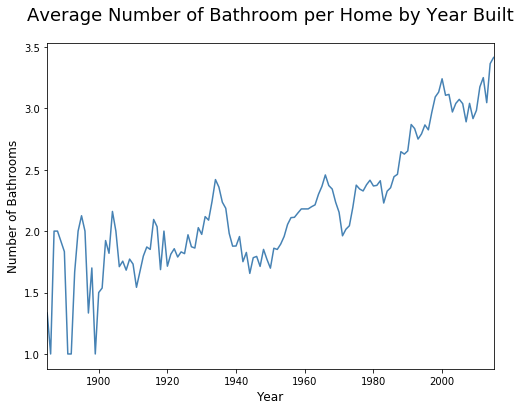

In [30]:
# y= properties_data.bathroomcnt
# x=properties_data.yearbuilt

properties_data_groupedYear.plot(kind='line', x='yearbuilt', y='bathroomcnt', style='steelblue', figsize=(8,6)
                                )
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Bathrooms', fontsize=12)
plt.title('Average Number of Bathroom per Home by Year Built', fontsize=18, y= 1.05)

plt.legend().set_visible(False)

In [31]:
properties_data.drop('abslogerror', axis=1, inplace =True)

# Missing values

# Missing values, Nan

In [32]:
# make a new df for missing values count
missing_data = properties_data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Name', 'Number of Missing']
# percent missing values, sort
missing_data['Percent']= missing_data['Number of Missing']/90275*100
missing_data = missing_data.round({'Percent': 2}).sort_values(by='Percent', ascending=False)
missing_data= missing_data[missing_data.Percent >0]
missing_data

,Name,Number of Missing,Percent
8,buildingclasstypeid,90259,99.98
15,finishedsquarefeet13,90242,99.96
43,storytypeid,90232,99.95
5,basementsqft,90232,99.95
48,yardbuildingsqft26,90180,99.89
51,fireplaceflag,90053,99.75
4,architecturalstyletypeid,90014,99.71
45,typeconstructiontypeid,89976,99.67
18,finishedsquarefeet6,89854,99.53
11,decktypeid,89617,99.27


## Fireplace:  create a new feature (flag, 0-1): if there is a non-Nan value in either fireplacecnt and fireplaceflag, set the value to 1 and if not, set it to 0. 


In [33]:
properties_data['HasFirePlace'] = np.where((properties_data['fireplacecnt'].notnull()) | 
                                           (properties_data['fireplaceflag'].notnull()) , 1, 0)

## Garage count: the sqfeet has 0 when count actually says there is a garage. so using the count is better. replace Nan with 0: no garage

In [34]:
properties_data.garagecarcnt.fillna(0, inplace=True)

## pool: if any of these has values, then there is a pool. so creat a flag feature and set to 1 for any value. poolsizesum	pooltypeid10	pooltypeid2	pooltypeid7

In [35]:
properties_data['HasPoolSPA'] = np.where((properties_data['poolsizesum'].notnull()) | 
                                           (properties_data['pooltypeid10'].notnull())| 
                                           (properties_data['pooltypeid2'].notnull())| 
                                           (properties_data['pooltypeid7'].notnull())| 
                                           (properties_data['hashottuborspa'].notnull()), 1, 0)

## Air condition: if the value is 5 (code 5 is none), or Nan then there is no AC.

In [36]:
properties_data['HasAC'] = np.where((properties_data['airconditioningtypeid'].isnull())|
                                    (properties_data['airconditioningtypeid'] == 5), 0,1)

## FIPS : one hot encoding, to dummy
Los Angeles	6037<br>
Orange	6059	<br>
Ventura	6111

In [37]:
temp =pd.get_dummies(properties_data['fips'])
properties_data['CountyLosAngeles'] = temp[6037.0]
properties_data['CountyOrange'] = temp[6059.0]
properties_data['CountyVentura'] = temp[6111.0]

# list of chosen features and label
'BathroomCount','BeedromCount','FloorSize','HasFirePlace',
'GarageCount','LotSize','HasPoolSPA','RoomCount','Tax',
'HasAC', 'yearbuilt', 'StructureTaxValue', 'LandTaxValue',
'CountyVentura', 'CountyOrange', 'CountyLosAngeles'


# Rename the desired columns

In [38]:
properties_data.rename(index=str, columns={'bathroomcnt': 'BathroomCount','bedroomcnt': 'BeedromCount',
                                           'calculatedfinishedsquarefeet': 'FloorSize','garagecarcnt': 'GarageCount',
                                           'lotsizesquarefeet': 'LotSize','roomcnt': 'RoomCount',
                                           #'taxamount': 'Tax','taxvaluedollarcnt': 'TotalTaxValue', 
                                           'landtaxvaluedollarcnt': 'LandTaxValue',
                                           'structuretaxvaluedollarcnt':'StructureTaxValue' }, inplace=True)

# New DF, only selected features

In [39]:
data =properties_data.copy()
ListC= ['BathroomCount','BeedromCount','RoomCount',
        'FloorSize','LotSize', 'yearbuilt',
        'HasFirePlace','HasPoolSPA','HasAC','GarageCount',
        #'Tax', 'TotalTaxValue',
        'StructureTaxValue', 'LandTaxValue',
        'transaction_month', 'CountyVentura', 'CountyOrange', 
        'CountyLosAngeles', 'logerror']
data=data[ListC]
data.to_csv('data/data.csv')
data=data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79623 entries, 0 to 90274
Data columns (total 17 columns):
BathroomCount        79623 non-null float64
BeedromCount         79623 non-null float64
RoomCount            79623 non-null float64
FloorSize            79623 non-null float64
LotSize              79623 non-null float64
yearbuilt            79623 non-null float64
HasFirePlace         79623 non-null int64
HasPoolSPA           79623 non-null int64
HasAC                79623 non-null int64
GarageCount          79623 non-null float64
StructureTaxValue    79623 non-null float64
LandTaxValue         79623 non-null float64
transaction_month    79623 non-null int64
CountyVentura        79623 non-null uint8
CountyOrange         79623 non-null uint8
CountyLosAngeles     79623 non-null uint8
logerror             79623 non-null float64
dtypes: float64(10), int64(4), uint8(3)
memory usage: 9.3+ MB


# Corelations

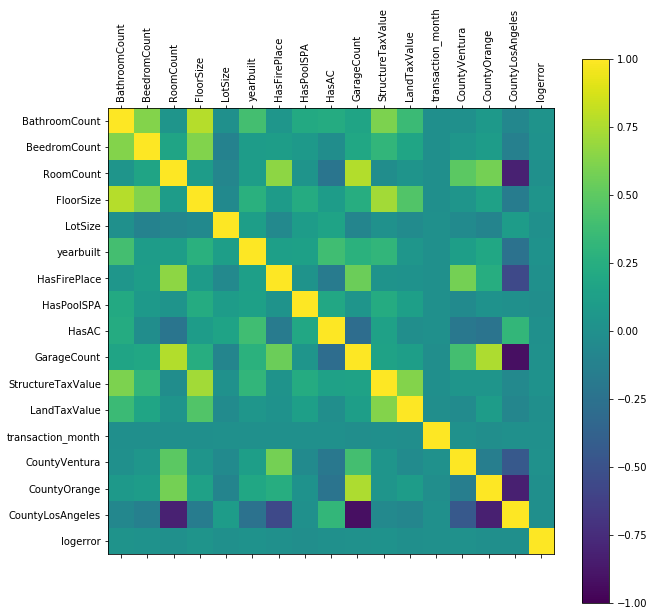

In [40]:
correlations = data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,17,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ListC, rotation=90)
ax.set_yticklabels(ListC)
plt.show()

# Train-Test Preparation

In [41]:
Label = data['logerror']
Features = data.drop(['logerror'], axis = 1)
# feature scaling
Features = MinMaxScaler().fit_transform(Features)
X_train, X_test, Y_train, Y_test = train_test_split(Features, Label, test_size=0.2, random_state=42)

# Benchmatk Model

In [42]:
# calculate  Mean Absolute Error and Root Mean Squared Error


In [43]:
# returns average of absolute logerror values for all log errors
BenchmarkPred = Y_test.abs().mean()
Benchmark_result= pd.DataFrame({'Index_Orig':Y_test.index, 'logerror':Y_test.values})
Benchmark_result ['Benckmark_Predict']= BenchmarkPred
Benchmark_MAE = mean_absolute_error(Benchmark_result ['logerror'], Benchmark_result ['Benckmark_Predict'])
Benchmark_RMSE = sqrt(mean_squared_error(Benchmark_result ['logerror'], Benchmark_result ['Benckmark_Predict']))
print "MAE for benchmark model is", Benchmark_MAE
print "RMSE for benchmark model is", Benchmark_RMSE


MAE for benchmark model is 0.100695393513
RMSE for benchmark model is 0.182605106132


# Modeling

# Linear Regression 

In [44]:
Model_LReg = LinearRegression()
Model_LReg.fit(X_train, Y_train)
Model_LReg_Pred = Model_LReg.predict(X_test)
Model_LRe_MAE = mean_absolute_error(Y_test, Model_LReg_Pred)
Model_LRe_RMSE = sqrt(mean_squared_error(Y_test, Model_LReg_Pred))
print "MAE for Linear Regression model is", Model_LRe_MAE
print "RMSE for Linear Regression model is", Model_LRe_RMSE

MAE for Linear Regression model is 0.0715648633732
RMSE for Linear Regression model is 0.172086743616


# Lasso Regression

### Before Tuning

In [45]:
Model_LassoReg = Lasso()
Model_LassoReg.fit(X_train, Y_train)
Model_LassoReg_Pred = Model_LassoReg.predict(X_test)
Model_LassoReg_MAE = mean_absolute_error(Y_test, Model_LassoReg_Pred)
Model_LassoReg_RMSE = sqrt(mean_squared_error(Y_test, Model_LassoReg_Pred))
print "MAE for Lasso Regression model is", Model_LassoReg_MAE
print "RMSE for Lasso Regression model is", Model_LassoReg_RMSE

MAE for Lasso Regression model is 0.0717224270478
RMSE for Lasso Regression model is 0.172333130328


### Tuning


In [46]:
# After Tuning 

pipe_LassoReg = Pipeline([
#     ('selectFeatures', SelectKBest()),
    ('Regressor', Lasso())
])
param_grid_LassoReg = [
    {
        'Regressor__alpha' : [ 0, 1, 100, 1000],
        'Regressor__max_iter' : [500, 1000]
    },
]
#gridsearch
grid_LassoReg = GridSearchCV(pipe_LassoReg, param_grid = param_grid_LassoReg, scoring='neg_mean_absolute_error')
grid_LassoReg.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Regressor', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'Regressor__max_iter': [500, 1000], 'Regressor__alpha': [0, 1, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

### AFter Tuning


In [47]:
grid_LassoReg_Pred = grid_LassoReg.predict(X_test)
grid_LassoReg_MAE = mean_absolute_error(Y_test, grid_LassoReg_Pred)
grid_LassoReg_RMSE = sqrt(mean_squared_error(Y_test, grid_LassoReg_Pred))
print "MAE for Lasso Regression model is", grid_LassoReg_MAE
print "RMSE for Lasso Regression model is", grid_LassoReg_RMSE

MAE for Lasso Regression model is 0.0715599825916
RMSE for Lasso Regression model is 0.172084490353


In [48]:
# print grid_LassoReg.best_score_
# print grid_LassoReg.best_estimator_
# print grid_LassoReg.best_params_
# print grid_LassoReg.cv_results_ 
# print grid_LassoReg.best_index_ 

# Ridge Regression

### Before Tuning

In [49]:
# Before Tuning
Model_RidgeReg = Ridge()
Model_RidgeReg.fit(X_train, Y_train)
Model_RidgeReg_Pred = Model_RidgeReg.predict(X_test)
Model_RidgeReg_MAE = mean_absolute_error(Y_test, Model_RidgeReg_Pred)
Model_RidgeReg_RMSE = sqrt(mean_squared_error(Y_test, Model_RidgeReg_Pred))
print "MAE for Ridge Regression model is", Model_RidgeReg_MAE
print "RMSE for Ridge Regression model is", Model_RidgeReg_RMSE

MAE for Ridge Regression model is 0.0715494341297
RMSE for Ridge Regression model is 0.172082727973


### Tuning


In [50]:
# After Tuning 
pipe_ridgereg = Pipeline([
#     ('selectFeatures', SelectKBest()),
    ('Regressor', Ridge())
])
param_grid_ridgereg = [
    {
        'Regressor__alpha' : [ 0, 1, 100, 1000],
        'Regressor__max_iter' : [500, 1000]
    },
]
#gridsearch
grid_ridgereg = GridSearchCV(pipe_ridgereg, param_grid = param_grid_ridgereg, scoring='neg_mean_absolute_error')
grid_ridgereg.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'Regressor__max_iter': [500, 1000], 'Regressor__alpha': [0, 1, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

### AFter Tuning


In [51]:
# After Tuning Test
grid_ridgereg_Pred = grid_ridgereg.predict(X_test)
grid_ridgereg_MAE = mean_absolute_error(Y_test, grid_ridgereg_Pred)
grid_ridgereg_RMSE = sqrt(mean_squared_error(Y_test, grid_ridgereg_Pred))
print "MAE for Ridge Regression model is", grid_ridgereg_MAE
print "RMSE for Ridge Regression model is", grid_ridgereg_RMSE

MAE for Ridge Regression model is 0.0715494341297
RMSE for Ridge Regression model is 0.172082727973


In [52]:
# print grid_ridgereg.best_score_
# print grid_ridgereg.best_estimator_
# print grid_ridgereg.best_params_
# print grid_ridgereg.cv_results_ 
# print grid_ridgereg.best_index_ 

# Decision Tree Regression

### Before Tuning

In [53]:
# Before Tuning

Model_DTR = DecisionTreeRegressor(random_state=42)
Model_DTR.fit(X_train, Y_train)
Model_DTR_Pred = Model_DTR.predict(X_test)
Model_DTR_MAE = mean_absolute_error(Y_test, Model_DTR_Pred)
Model_DTR_RMSE = sqrt(mean_squared_error(Y_test, Model_DTR_Pred))
print "MAE for Decision Tree Regression model is", Model_DTR_MAE
print "RMSE for Decision Tree Regression model is", Model_DTR_RMSE

MAE for Decision Tree Regression model is 0.118212156986
RMSE for Decision Tree Regression model is 0.246390827677


### Tuning


In [54]:
# After Tuning

pipe_DTR = Pipeline([
#     ('selectFeatures', SelectKBest()),
    ('Regressor', DecisionTreeRegressor())
])
param_grid_DTR = [
    {
        'Regressor__criterion' : ['mse', 'friedman_mse', 'mae'], 
        'Regressor__splitter' : [ 'best', 'random'],
        'Regressor__max_depth' : [ 2,5], 
        'Regressor__min_samples_split' : [2, 4],
        'Regressor__random_state': [42]        
    },
]

#gridsearch
grid_DTR = GridSearchCV (pipe_DTR, param_grid = param_grid_DTR, n_jobs=2, scoring='neg_mean_absolute_error')
grid_DTR = grid_DTR.fit(X_train, Y_train)



### AFter Tuning


In [55]:
# After Tuning Test

grid_DTR_Pred = grid_DTR.predict(X_test)
grid_DTR_MAE = mean_absolute_error(Y_test, grid_DTR_Pred)
grid_DTR_RMSE = sqrt(mean_squared_error(Y_test, grid_DTR_Pred))
print "MAE for Decision Tree Regression model is", grid_DTR_MAE
print "RMSE for Decision Tree Regression model is", grid_DTR_RMSE

MAE for Decision Tree Regression model is 0.0711453877551
RMSE for Decision Tree Regression model is 0.172428751098


In [56]:
# print grid_DTR.best_score_
# print grid_DTR.best_estimator_
# print grid_DTR.best_params_
# print grid_DTR.cv_results_ 
# print grid_DTR.best_index_ 

# Gradient Boosting Regression

### Before Tuning

In [57]:
# Before Tuning

Model_GBR = GradientBoostingRegressor(random_state=42)
Model_GBR.fit(X_train, Y_train)
Model_GBR_Pred = Model_GBR.predict(X_test)
Model_GBR_MAE = mean_absolute_error(Y_test, Model_GBR_Pred)
Model_GBR_RMSE = sqrt(mean_squared_error(Y_test, Model_GBR_Pred))
print "MAE for Gradient Boosting Regression model is", Model_GBR_MAE
print "RMSE for Gradient Boosting Regression model is", Model_GBR_RMSE

MAE for Gradient Boosting Regression model is 0.0716858179172
RMSE for Gradient Boosting Regression model is 0.172597037569


### Tuning


In [58]:
# After Tuning

pipe_GBR = Pipeline([
#     ('selectFeatures', SelectKBest()),
    ('Regressor', GradientBoostingRegressor())
])
param_grid_GBR = [
    {
        'Regressor__n_estimators' : [100, 500, 1000], 
        'Regressor__max_depth' : [ 1, 3, 5],
        'Regressor__loss' : ['ls', 'lad', 'huber', 'quantile'], 
        'Regressor__learning_rate' : [0.05, 0.1]
    },
]


#gridsearch
grid_GBR = GridSearchCV(pipe_GBR, param_grid = param_grid_GBR, n_jobs=2, scoring='neg_mean_absolute_error')
grid_GBR.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Regressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=...=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'Regressor__loss': ['ls', 'lad', 'huber', 'quantile'], 'Regressor__learning_rate': [0.05, 0.1], 'Regressor__n_estimators': [100, 500, 1000], 'Regressor__max_depth': [1, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

### AFter Tuning


In [59]:
grid_GBR_Pred = grid_GBR.predict(X_test)
grid_GBR_MAE = mean_absolute_error(Y_test, grid_GBR_Pred)
grid_GBR_RMSE = sqrt(mean_squared_error(Y_test, grid_GBR_Pred))
print "MAE for Gradient Boosting Regression model is", grid_GBR_MAE
print "RMSE for Gradient Boosting Regression model is",grid_GBR_RMSE

MAE for Gradient Boosting Regression model is 0.0707911692087
RMSE for Gradient Boosting Regression model is 0.172049019354


In [60]:
print grid_GBR.best_score_

-0.0684058486963


In [61]:
print grid_GBR.best_estimator_

Pipeline(memory=None,
     steps=[('Regressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='lad', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))])


In [62]:
print grid_GBR.best_params_

{'Regressor__loss': 'lad', 'Regressor__learning_rate': 0.05, 'Regressor__n_estimators': 1000, 'Regressor__max_depth': 3}


# Choose the best Algorithm

### Before Tuning

In [63]:
Results= pd.DataFrame(columns=['MAE','RMSE'], 
                      index=['Benchmark', 'Linear', 'Lasso', 
                              'Ridge', 'Gradient Boosting', 
                              'Decision Tree'])
Results.columns.name = 'Index'
Results.loc['Benchmark'] = pd.Series({'MAE': Benchmark_MAE,'RMSE':Benchmark_RMSE})
Results.loc['Linear'] = pd.Series({'MAE': Model_LRe_MAE,'RMSE':Model_LRe_RMSE})
Results.loc['Lasso'] = pd.Series({'MAE': Model_LassoReg_MAE,'RMSE':Model_LassoReg_RMSE})
Results.loc['Ridge'] = pd.Series({'MAE': Model_RidgeReg_MAE,'RMSE':Model_RidgeReg_RMSE})
Results.loc['Gradient Boosting'] = pd.Series({'MAE': Model_GBR_MAE,'RMSE':Model_GBR_RMSE})
Results.loc['Decision Tree'] = pd.Series({'MAE': Model_DTR_MAE,'RMSE':Model_DTR_RMSE})

### AFter Tuning

In [64]:
Results_Tuned= pd.DataFrame(columns=['MAE','RMSE'], 
                      index=['Benchmark', 'Linear', 'Lasso', 
                              'Ridge', 'Gradient Boosting', 
                              'Decision Tree'])
Results_Tuned.columns.name = 'Index'
Results_Tuned.loc['Benchmark'] = pd.Series({'MAE': Benchmark_MAE,'RMSE':Benchmark_RMSE})
Results_Tuned.loc['Linear'] = pd.Series({'MAE': Model_LRe_MAE,'RMSE':Model_LRe_RMSE})
Results_Tuned.loc['Lasso'] = pd.Series({'MAE': grid_LassoReg_MAE,'RMSE':grid_LassoReg_RMSE})
Results_Tuned.loc['Ridge'] = pd.Series({'MAE': grid_ridgereg_MAE,'RMSE':grid_ridgereg_RMSE})
Results_Tuned.loc['Gradient Boosting'] = pd.Series({'MAE': grid_GBR_MAE,'RMSE':grid_GBR_RMSE})
Results_Tuned.loc['Decision Tree'] = pd.Series({'MAE': grid_DTR_MAE,'RMSE':grid_DTR_RMSE})

# Feature importance

In [65]:
# Feature importance:  Gradient Boosting Regression
best_model_GBR = GradientBoostingRegressor(random_state=42, 
                                           loss='lad', 
                                           learning_rate= 0.1, 
                                           n_estimators= 100, 
                                           max_depth= 3)

best_model_GBR.fit(X_train, Y_train)
# feature importance
importance = best_model_GBR.feature_importances_

In [66]:
feature_only_data = data.drop(['logerror'], axis = 1)
names= list(feature_only_data)
GBR_importance = pd.DataFrame()
GBR_importance['Importance'] = importance
GBR_importance['Features'] = names
GBR_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [67]:
GBR_importance = pd.DataFrame()
GBR_importance['Importance'] = importance
GBR_importance['Features'] = names
GBR_importance.sort_values(by='Importance', ascending=False, inplace=True)

Text(0.5,1.02,u'Feature Importance \n(Optimized Gradient Boosting Regression)')

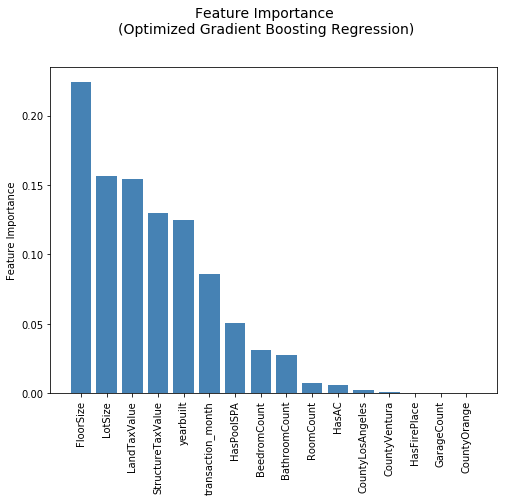

In [68]:
plt.figure()
plt.figure(figsize=(8,6))
index = [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15]
plt.bar(index, GBR_importance['Importance'], color='steelblue', align="center")
plt.xticks(index, GBR_importance['Features'], rotation=90)

plt.ylabel('Feature Importance')
plt.xlabel('', fontsize=12)
# for tick in ax.get_xticklabels():
#         tick.set_rotation(90)
plt.suptitle('Feature Importance \n(Optimized Gradient Boosting Regression)', fontsize=14, y=1.02)

In [69]:
# print grid_GBR.cv_results_ 

In [70]:
# print grid_GBR.best_index_ 

In [71]:
Results

Index,MAE,RMSE
Benchmark,0.100695,0.182605
Linear,0.0715649,0.172087
Lasso,0.0717224,0.172333
Ridge,0.0715494,0.172083
Gradient Boosting,0.0716858,0.172597
Decision Tree,0.118212,0.246391


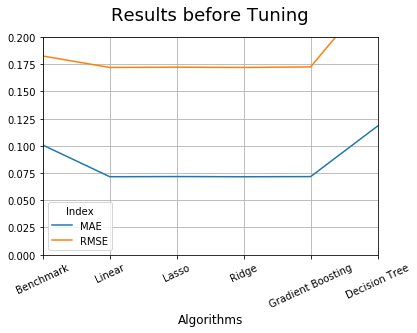

In [72]:
# plot comparison
# fig = plt.figure()
# ax = fig.add_subplot(111)data = Results, rot=45
plt.figure(figsize=(8,6))
Results.plot(rot=25)
plt.xlabel('Algorithms', fontsize=12)
plt.grid(True)
plt.ylim((0,0.2))
plt.title('Results before Tuning', fontsize=18, y= 1.05)
plt.show()

In [73]:
Results_Tuned

Index,MAE,RMSE
Benchmark,0.100695,0.182605
Linear,0.0715649,0.172087
Lasso,0.07156,0.172084
Ridge,0.0715494,0.172083
Gradient Boosting,0.0707912,0.172049
Decision Tree,0.0711454,0.172429


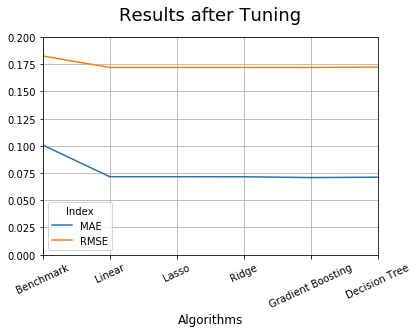

In [74]:
plt.figure(figsize=(8,6))
Results_Tuned.plot(rot=25)
plt.xlabel('Algorithms', fontsize=12)
plt.grid(True)
plt.ylim((0,0.2))
plt.title('Results after Tuning', fontsize=18, y= 1.05)
plt.show()

In [75]:

# total importance of top 5 features
GBR_importance.head(5)['Importance'].sum()

0.789625504717782